# Projet 3 - Anticipez les besoins en consommation de bâtiments

## Notebook de predictions

Le but de ce notebook est d'utiliser le dataset clean généré par l'analyse exploratoire, et de créer des modèles prédictifs pour les consommations énergétiques et l'émission de CO2.

In [169]:
import pandas as pd
from MLUtils import DataAnalysis, DataEngineering

import warnings
warnings.filterwarnings("ignore")

In [170]:
# Importation du jeu de données
df = pd.read_csv('data/clean.csv')

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   BuildingType                        3337 non-null   int64  
 1   PrimaryPropertyType                 3337 non-null   int64  
 2   NumberofBuildings                   3337 non-null   float64
 3   NumberofFloors                      3337 non-null   float64
 4   PropertyGFAParking                  3337 non-null   int64  
 5   ENERGYSTARScore                     2524 non-null   float64
 6   SiteEUI(kBtu/sf)                    3337 non-null   float64
 7   SiteEUIWN(kBtu/sf)                  3337 non-null   float64
 8   SourceEUI(kBtu/sf)                  3337 non-null   float64
 9   SourceEUIWN(kBtu/sf)                3337 non-null   float64
 10  SiteEnergyUse(kBtu)                 3337 non-null   float64
 11  SiteEnergyUseWN(kBtu)               3337 no

In [172]:
df.describe()

,BuildingType,PrimaryPropertyType,NumberofBuildings,NumberofFloors,PropertyGFAParking,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),...,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST,Age,EnergyUse_Age_Ratio
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,2524.000000,3337.000000,3337.000000,3337.000000,3337.000000,...,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,0.492958,1.002098,1.107582,1.198690,8063.891819,67.947306,55.075187,57.418430,135.028289,138.631885,...,0.112376,0.074618,0.125562,0.054840,0.082709,0.065328,0.028169,0.048846,54.464789,1.611193
std,0.500025,1.221925,2.118095,1.029832,32475.541333,26.851849,56.393783,57.270796,139.534209,139.315264,...,0.315876,0.262813,0.331405,0.227701,0.275483,0.247141,0.165480,0.215579,33.148610,2.348184
min,0.000000,0.000000,0.000000,-9.210340,0.000000,1.000000,0.400000,0.000000,0.000000,-2.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.006195
25%,0.000000,0.000000,1.000000,0.693197,0.000000,53.000000,28.000000,29.500000,74.900002,78.699997,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.507143
50%,0.000000,0.000000,1.000000,1.386319,0.000000,75.000000,38.799999,41.000000,96.500000,101.400002,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.000000,0.861702
75%,1.000000,2.000000,1.000000,1.609458,0.000000,90.000000,60.599998,64.500000,144.800003,149.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.000000,1.857778
max,1.000000,3.000000,111.000000,4.595121,512608.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,123.000000,53.963634


#### Normalisation des données avec MinMaxScaler

In [173]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Sélection des colonnes numériques
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Sélection des colonnes non numériques
non_numeric_columns = df.select_dtypes(exclude=['int64', 'float64']).columns

# Création du scaler
scaler = MinMaxScaler()

# Application de la normalisation sur les colonnes numériques
scaled_numeric_data = scaler.fit_transform(df[numeric_columns])

# Création d'un DataFrame pour les données normalisées
df_scaled_numeric = pd.DataFrame(scaled_numeric_data, columns=numeric_columns)

# Combinaison des données numériques normalisées avec les données non numériques
df_scaled = pd.concat([df_scaled_numeric, df[non_numeric_columns].reset_index()], axis=1)

# Affichage des premières lignes pour vérifier la création de df_scaled
print(df_scaled.head())



   BuildingType  PrimaryPropertyType  NumberofBuildings  NumberofFloors  \
0           1.0             0.333333           0.009009        0.847147   
1           1.0             0.333333           0.009009        0.840844   
2           1.0             0.333333           0.009009        0.936145   
3           1.0             0.333333           0.009009        0.833941   
4           1.0             0.333333           0.009009        0.876517   

   PropertyGFAParking  ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
0            0.000000         0.595960          0.097482            0.101031   
1            0.029387         0.606061          0.113189            0.117330   
2            0.383759         0.424242          0.114628            0.117090   
3            0.000000         0.555556          0.132374            0.135786   
4            0.120950         0.747475          0.137170            0.142258   

   SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  ...  Neighborhood_LAKE 

TODO: Dropper les lignes sans energystarscore.
Faire une prédiction de la colonne TotalGHGEmission.
Ensuite faire le feature importance (mesurer les features qui ont le plus d'impact).
Puis, déterminer si la colonne energystarscore est importante ou pas.
Conclure sur l'utilité de garder cette colonne.

# Remplissage de la colonne ENERGYSTARScore en fonction des autres colonnes.

Le dataset ne contenait pas tous les scores ENERGYSTAR. Nous allons tout d'abord créer et appliquer un modèle qui va remplir cette colonne.

In [174]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

# Séparation du DataFrame en deux ensembles
df_scaled_with_score = df_scaled[df_scaled['ENERGYSTARScore'].notna()]
df_scaled_without_score = df_scaled[df_scaled['ENERGYSTARScore'].isna()]

# Séparation des caractéristiques (X) et de la cible (y) - Assurez-vous de retirer 'ENERGYSTARScore'
X = df_scaled_with_score.drop('ENERGYSTARScore', axis=1)
y = df_scaled_with_score['ENERGYSTARScore']

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [175]:
from sklearn.linear_model import LinearRegression

# Création et entraînement du modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Évaluation du modèle
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.07550808174141319


In [176]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet


# alpha et l1_ratio doivent être ajustés en fonction de vos données
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net_model.fit(X_train, y_train)

# Prédictions et évaluation
y_pred = elastic_net_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.07669224003897797


In [177]:
from sklearn.linear_model import Lasso

# Création et entraînement du modèle Lasso
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_train, y_train)

# Prédictions et évaluation
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Mean Squared Error (Lasso): {mse_lasso}")

Mean Squared Error (Lasso): 0.07669057896141265


In [178]:
from sklearn.linear_model import Ridge

# Création et entraînement du modèle Ridge
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train, y_train)

# Prédictions et évaluation
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Mean Squared Error (Ridge): {mse_ridge}")

Mean Squared Error (Ridge): 0.0692006690704025


In [179]:
from sklearn.svm import SVR

# Création et entraînement du modèle SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Prédictions et évaluation
y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f"Mean Squared Error (SVR): {mse_svr}")

Mean Squared Error (SVR): 0.07866175600048271


In [180]:
from xgboost import XGBRegressor

# Création et entraînement du modèle XGBoost
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Prédictions et évaluation
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"Mean Squared Error (XGBoost): {mse_xgb}")

Mean Squared Error (XGBoost): 0.03821928501112798


Le modèle XGBoost donne les meilleurs résultats. TODO: On l'utilise pour remplir les valeurs manquantes.

In [181]:
df.sample(10)

,BuildingType,PrimaryPropertyType,NumberofBuildings,NumberofFloors,PropertyGFAParking,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),...,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST,Age,EnergyUse_Age_Ratio
312,1,1,1.0,1.791776,0,53.0,70.599998,74.400002,221.800003,233.800003,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,44,1.604545
2808,0,0,1.0,1.386319,0,80.0,26.100000,27.500000,82.000000,86.300003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58,0.450000
406,1,3,0.0,0.693197,0,NaN,55.299999,55.799999,169.800003,170.300003,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,54,1.024074
1184,0,0,1.0,1.945924,0,95.0,37.400002,39.099998,92.300003,96.599998,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17,2.200000
1399,0,0,1.0,1.945924,22098,42.0,60.099998,64.900002,124.099998,135.699997,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,49,1.226531
2460,0,0,1.0,1.098646,0,75.0,61.500000,66.699997,93.599998,99.800003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,113,0.544248
2233,0,0,0.0,1.098646,0,98.0,23.299999,24.500000,49.799999,52.700001,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98,0.237755
921,0,0,1.0,1.098646,0,85.0,33.099998,35.299999,103.900002,110.800003,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,82,0.403659
2600,0,0,1.0,1.098646,0,46.0,30.200001,32.000000,94.900002,100.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54,0.559259
1747,0,0,1.0,1.609458,0,61.0,27.700001,30.100000,70.800003,76.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,47,0.589362


In [182]:
df.describe()

,BuildingType,PrimaryPropertyType,NumberofBuildings,NumberofFloors,PropertyGFAParking,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),...,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST,Age,EnergyUse_Age_Ratio
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,2524.000000,3337.000000,3337.000000,3337.000000,3337.000000,...,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,0.492958,1.002098,1.107582,1.198690,8063.891819,67.947306,55.075187,57.418430,135.028289,138.631885,...,0.112376,0.074618,0.125562,0.054840,0.082709,0.065328,0.028169,0.048846,54.464789,1.611193
std,0.500025,1.221925,2.118095,1.029832,32475.541333,26.851849,56.393783,57.270796,139.534209,139.315264,...,0.315876,0.262813,0.331405,0.227701,0.275483,0.247141,0.165480,0.215579,33.148610,2.348184
min,0.000000,0.000000,0.000000,-9.210340,0.000000,1.000000,0.400000,0.000000,0.000000,-2.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.006195
25%,0.000000,0.000000,1.000000,0.693197,0.000000,53.000000,28.000000,29.500000,74.900002,78.699997,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.507143
50%,0.000000,0.000000,1.000000,1.386319,0.000000,75.000000,38.799999,41.000000,96.500000,101.400002,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.000000,0.861702
75%,1.000000,2.000000,1.000000,1.609458,0.000000,90.000000,60.599998,64.500000,144.800003,149.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.000000,1.857778
max,1.000000,3.000000,111.000000,4.595121,512608.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,123.000000,53.963634


In [183]:
# write the resulting dataframe to a csv file
df.to_csv('data/clean_with_score.csv', index=False)

## On reprend le dataset original, pour déterminer si la colonne energystarscore est pertinente

On reprend le csv initial

In [184]:
df = pd.read_csv('data/clean.csv')

In [185]:
# remove empty lines for the column 'ENERGYSTARScore'
df = df[df['ENERGYSTARScore'].notna()]

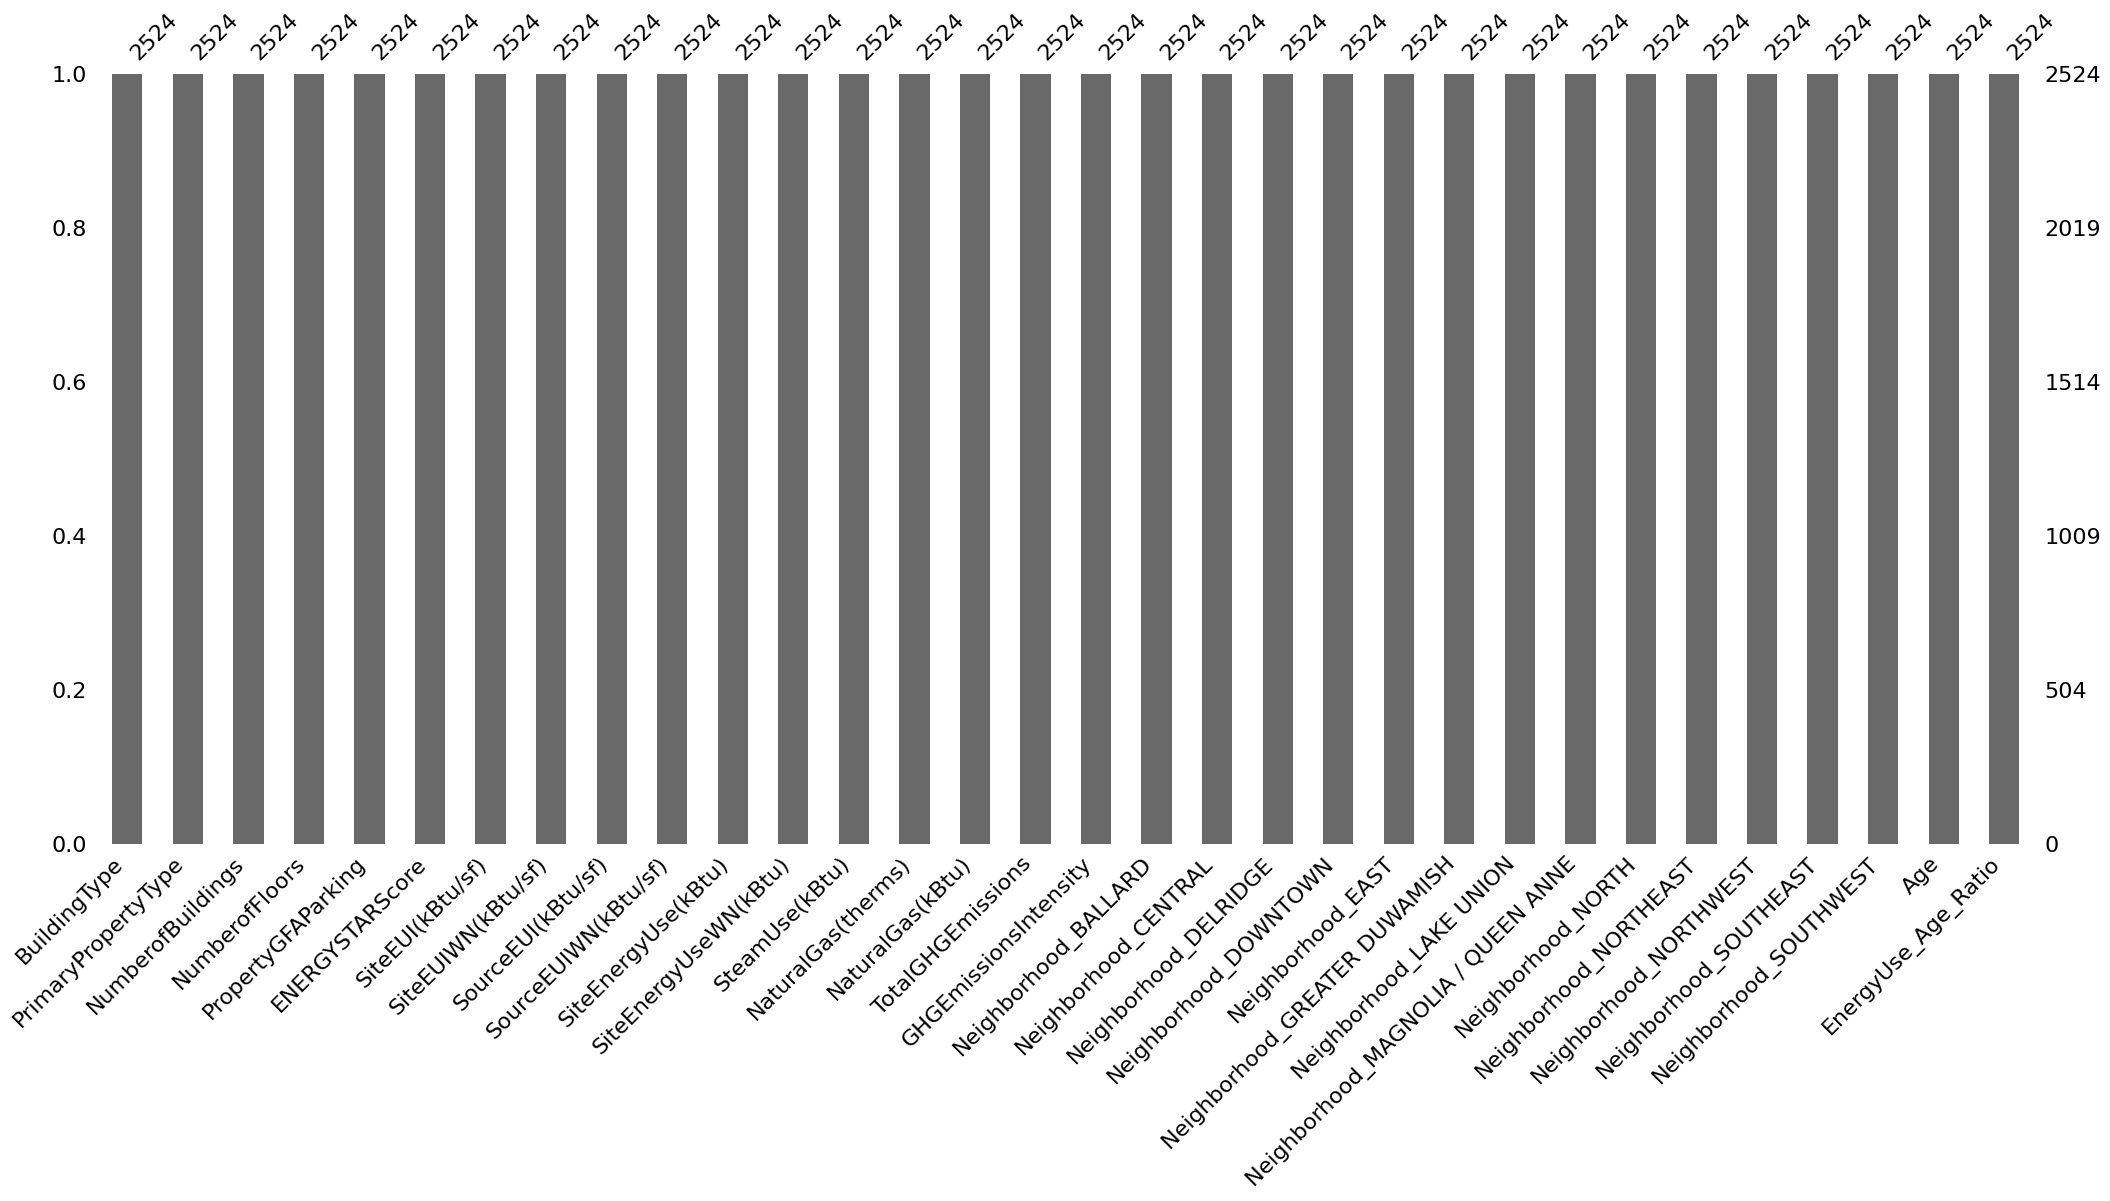

In [186]:
DataAnalysis.show_columns_population(df, type="bar")

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2524 entries, 0 to 3332
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   BuildingType                        2524 non-null   int64  
 1   PrimaryPropertyType                 2524 non-null   int64  
 2   NumberofBuildings                   2524 non-null   float64
 3   NumberofFloors                      2524 non-null   float64
 4   PropertyGFAParking                  2524 non-null   int64  
 5   ENERGYSTARScore                     2524 non-null   float64
 6   SiteEUI(kBtu/sf)                    2524 non-null   float64
 7   SiteEUIWN(kBtu/sf)                  2524 non-null   float64
 8   SourceEUI(kBtu/sf)                  2524 non-null   float64
 9   SourceEUIWN(kBtu/sf)                2524 non-null   float64
 10  SiteEnergyUse(kBtu)                 2524 non-null   float64
 11  SiteEnergyUseWN(kBtu)               2524 non-nul

#### Après avoir enlever les observations ayant un EnergyStarScore vide, nous obtenons un jeu de 2524 données.
Nous allons maintenant faire une prédiction pour la colonne TotalGHGEmissions.



In [188]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

# Assuming 'df' is your DataFrame
y = df['TotalGHGEmissions']
X = df.drop('TotalGHGEmissions', axis=1)
X = X.drop('SiteEnergyUseWN(kBtu)', axis=1)
X = X.drop('SiteEnergyUse(kBtu)', axis=1)
X = X.drop('GHGEmissionsIntensity', axis=1)
X = X.drop('SourceEUI(kBtu/sf)', axis=1)
X = X.drop('SourceEUIWN(kBtu/sf)', axis=1)
X = X.drop('SiteEUI(kBtu/sf)', axis=1)
X = X.drop('SiteEUIWN(kBtu/sf)', axis=1)
# X = X.drop('ENERGYSTARScore', axis=1)
X = X.drop('EnergyUse_Age_Ratio', axis=1)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Computing feature importance
feature_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
importance_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importance.importances_mean})
importance_df = importance_df.sort_values(by='importance', ascending=False)


In [189]:
importance_df.head(30)

,feature,importance
8,NaturalGas(kBtu),0.330624
7,NaturalGas(therms),0.304399
6,SteamUse(kBtu),0.091641
3,NumberofFloors,0.048816
2,NumberofBuildings,0.028611
4,PropertyGFAParking,0.016105
5,ENERGYSTARScore,0.003280
12,Neighborhood_DOWNTOWN,0.003160
1,PrimaryPropertyType,0.001609
0,BuildingType,0.001578


In [190]:
import plotly.express as px

# Drop negative values from the DataFrame
importance_df = importance_df[importance_df['importance'] > 0]

# Sorting values for better visualization
importance_df_sorted = importance_df.sort_values(by='importance')

# Creating the plot
fig = px.bar(importance_df_sorted, x='importance', y='feature', orientation='h', title="Feature Importances in Predicting Total GHG Emissions")
fig.show()


Nous allons prendre en considération les features importantes uniquement pour la suite de nos recherches de modèles de prédiction.
Etant donné l'aspect subjectif de la colonne ENERGYSTARScore (et malgré sa relative importance pour prédire les émissions de co²), nous allons aussi l'enlever.

In [191]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

# Assuming 'df' is your DataFrame
y = df['SiteEnergyUse(kBtu)']
X = df.drop('TotalGHGEmissions', axis=1)
X = X.drop('SiteEnergyUseWN(kBtu)', axis=1)
X = X.drop('SiteEnergyUse(kBtu)', axis=1)
X = X.drop('GHGEmissionsIntensity', axis=1)
X = X.drop('SourceEUI(kBtu/sf)', axis=1)
X = X.drop('SourceEUIWN(kBtu/sf)', axis=1)
X = X.drop('SiteEUI(kBtu/sf)', axis=1)
X = X.drop('SiteEUIWN(kBtu/sf)', axis=1)
# X = X.drop('ENERGYSTARScore', axis=1)
X = X.drop('EnergyUse_Age_Ratio', axis=1)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Computing feature importance
feature_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
importance_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importance.importances_mean})
importance_df = importance_df.sort_values(by='importance', ascending=False)


In [192]:
importance_df.head(30)

,feature,importance
3,NumberofFloors,0.231305
7,NaturalGas(therms),0.060558
8,NaturalGas(kBtu),0.054282
4,PropertyGFAParking,0.051944
5,ENERGYSTARScore,0.027396
1,PrimaryPropertyType,0.017891
0,BuildingType,0.012414
12,Neighborhood_DOWNTOWN,0.004391
2,NumberofBuildings,0.002739
6,SteamUse(kBtu),0.002534


In [193]:
import plotly.express as px

# Drop negative values from the DataFrame
importance_df = importance_df[importance_df['importance'] > 0]

# Sorting values for better visualization
importance_df_sorted = importance_df.sort_values(by='importance')

# Creating the plot
fig = px.bar(importance_df_sorted, x='importance', y='feature', orientation='h', title="Feature Importances in Predicting Site Energy Use (kBtu)")
fig.show()

Nos analyses nous permettent de constater que les colonnes utiles pour les prédictions de TotalGHGEmissions (Emission de co²) et de SiteEnergyUse(kBtu) (Utilisation totale d'énergie) sont les suivantes :
- NumberofFloors
- NaturalGas(therms)
- PropertyGFAParking
- NaturalGas(kBtu)
- PrimaryPropertyType
- BuildingType
- Neighborhood_DOWNTOWN
- Neighborhood_GREATER DUWAMISH
- NumberofBuildings
- SteamUse(kBtu)

In [194]:
df = pd.read_csv('data/clean.csv')

# Only keep the following columns : NumberofFloors, NaturalGas(therms), PropertyGFAParking, NaturalGas(kBtu), PrimaryPropertyType, BuildingType, Neighborhood_DOWNTOWN, Neighborhood_GREATER DUWAMISH, NumberofBuildings, SteamUse(kBtu)
df = df[['TotalGHGEmissions', 'SiteEnergyUse(kBtu)', 'NumberofFloors', 'NaturalGas(therms)', 'PropertyGFAParking', 'NaturalGas(kBtu)', 'PrimaryPropertyType', 'BuildingType', 'Neighborhood_DOWNTOWN', 'Neighborhood_GREATER DUWAMISH', 'NumberofBuildings', 'SteamUse(kBtu)']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   TotalGHGEmissions              3337 non-null   float64
 1   SiteEnergyUse(kBtu)            3337 non-null   float64
 2   NumberofFloors                 3337 non-null   float64
 3   NaturalGas(therms)             3337 non-null   float64
 4   PropertyGFAParking             3337 non-null   int64  
 5   NaturalGas(kBtu)               3337 non-null   float64
 6   PrimaryPropertyType            3337 non-null   int64  
 7   BuildingType                   3337 non-null   int64  
 8   Neighborhood_DOWNTOWN          3337 non-null   float64
 9   Neighborhood_GREATER DUWAMISH  3337 non-null   float64
 10  NumberofBuildings              3337 non-null   float64
 11  SteamUse(kBtu)                 3337 non-null   float64
dtypes: float64(9), int64(3)
memory usage: 313.0 KB


In [195]:
df.describe()

,TotalGHGEmissions,SiteEnergyUse(kBtu),NumberofFloors,NaturalGas(therms),PropertyGFAParking,NaturalGas(kBtu),PrimaryPropertyType,BuildingType,Neighborhood_DOWNTOWN,Neighborhood_GREATER DUWAMISH,NumberofBuildings,SteamUse(kBtu)
count,3337.000000,3.337000e+03,3337.000000,3.337000e+03,3337.000000,3.337000e+03,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3.337000e+03
mean,120.311768,5.446219e+06,1.198690,1.373151e+04,8063.891819,1.373151e+06,1.002098,0.492958,0.169613,0.112376,1.107582,2.770645e+05
std,541.137183,2.171484e+07,1.029832,6.737705e+04,32475.541333,6.737705e+06,1.221925,0.500025,0.375349,0.315876,2.118095,3.929638e+06
min,-0.800000,1.340900e+04,-9.210340,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,9.580000,9.366165e+05,0.693197,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00
50%,34.110000,1.814947e+06,1.386319,3.259356e+03,0.000000,3.259360e+05,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00
75%,94.020000,4.236396e+06,1.609458,1.189904e+04,0.000000,1.189904e+06,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000e+00
max,16870.980000,8.739237e+08,4.595121,2.979090e+06,512608.000000,2.979090e+08,3.000000,1.000000,1.000000,1.000000,111.000000,1.349435e+08


In [196]:
# Make a GridSearch to find the best parameters for the model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'df' is your DataFrame
y = df['TotalGHGEmissions']
X = df.drop('TotalGHGEmissions', axis=1)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Creating the GridSearchCV object
model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [10,20,30,40,50,60,70,80],
    'max_depth': [13],
    'max_features': [4, 5, 6, 7,8,9]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Training the model
grid_search.fit(X_train, y_train)






Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [13], 'max_features': [4, 5, 6, 7, 8, 9],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80]},
             verbose=2)

In [197]:
import pandas as pd
import plotly.graph_objects as go

# Assuming that grid_search.cv_results_ is defined elsewhere and contains the grid search results
cv_results = pd.DataFrame(grid_search.cv_results_)

cv_results['param_n_estimators'] = cv_results['param_n_estimators'].astype(int)
cv_results['param_max_features'] = cv_results['param_max_features'].astype(str)

pivot_df = cv_results.pivot(index='param_n_estimators', columns='param_max_features', values='mean_test_score')

pivot_df.index = pivot_df.index.astype(str)
pivot_df.columns = pivot_df.columns.astype(str)

# Create a new DataFrame to hold the percentage format text
text = [[f"{val:.2%}" for val in row] for row in pivot_df.values]

fig = go.Figure(data=go.Heatmap(
    z=pivot_df.values,
    x=pivot_df.columns.tolist(),
    y=pivot_df.index.tolist(),
    colorscale='RdYlGn',
    reversescale=False,
    text=text,  # Add the percentage text
    texttemplate="%{text}",  # Use the text from the text argument
    hoverinfo="z+text"  # Show the percentage text on hover
))

fig.update_layout(
    title='Grid Search Results',
    xaxis_title='max_features',
    yaxis_title='n_estimators',
    height=500
)

fig.show()
